In [707]:
# Cell 1: Import necessary libraries
import os
import re
import numpy as np
from collections import defaultdict, Counter

In [708]:
# Cell 2: Function to clean and tokenize text
def clean_and_tokenize(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()  # Split by whitespace
    return tokens

In [709]:
# Cell 3: Function to generate N-grams from tokens
def generate_ngrams(tokens, n):
    ngrams = [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
    return ngrams

In [710]:
# Cell 4: Function to split data into training, validation, and test sets
def train_val_test_split(data, train_ratio=0.7, val_ratio=0.15, random_seed=42):
    np.random.seed(random_seed)
    np.random.shuffle(data)
    train_size = int(len(data) * train_ratio)
    val_size = int(len(data) * val_ratio)
    train_data = data[:train_size]
    val_data = data[train_size:train_size+val_size]
    test_data = data[train_size+val_size:]
    return train_data, val_data, test_data

In [711]:
# Cell 5: Naive Bayes Classifier class
class NaiveBayesClassifier:
    def __init__(self):
        self.class_counts = defaultdict(int)
        self.token_counts = defaultdict(lambda: defaultdict(int))
        self.class_totals = defaultdict(int)
        self.vocabulary = set()
    
    def train(self, data, labels):
        for tokens, label in zip(data, labels):
            self.class_counts[label] += 1
            self.class_totals[label] += len(tokens)
            for token in tokens:
                self.token_counts[label][token] += 1
                self.vocabulary.add(token)
    
    def predict(self, tokens):
        log_probs = {}
        total_docs = sum(self.class_counts.values())
        
        for label in self.class_counts:
            log_probs[label] = np.log(self.class_counts[label] / total_docs)
            for token in tokens:
                token_probability = (self.token_counts[label][token] + 1) / (self.class_totals[label] + len(self.vocabulary))
                log_probs[label] += np.log(token_probability)
        
        return max(log_probs, key=log_probs.get)

In [712]:
def load_data(folder_path, page_size, pages_per_book):
    data = []
    labels = []
    filepaths = []
    
    # Get all .txt files and sort them
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
    sorted_files = sorted(all_files)
    
    for book_num, filename in enumerate(sorted_files, 1):
        filepath = os.path.join(folder_path, filename)
        filepaths.append(filepath)
        
        with open(filepath, 'r', encoding='utf-8') as f:
            text = f.read()
            tokens = clean_and_tokenize(text)
            # Split the book into pages and limit to pages_per_book
            pages = [tokens[i:i+page_size] for i in range(0, len(tokens), page_size)][:pages_per_book]
            for page in pages:
                ngrams = generate_ngrams(page, n=2)  # Change n for different N-grams
                data.append(ngrams)
                labels.append(f'Book_{book_num}')
    
    return data, labels, filepaths

In [713]:
# Cell 7: Example usage
# Get all .txt files from the harry_potter_books folder
folder_path = 'harry_potter_books'
filepaths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.txt')]

print("Filepaths of the Harry Potter books:")
for filepath in filepaths:
    print(filepath)

Filepaths of the Harry Potter books:
harry_potter_books/HP5.txt
harry_potter_books/HP4.txt
harry_potter_books/HP6.txt
harry_potter_books/HP7.txt
harry_potter_books/HP3.txt
harry_potter_books/HP2.txt
harry_potter_books/HP1.txt


In [714]:
# Use the function
folder_path = 'harry_potter_books'  # Update this to your actual folder path

book_page_counts = Counter(labels)

#240,190S
data, labels, filepaths = load_data(folder_path, page_size=250, pages_per_book=240)

# Print some information about the loaded data
print(f"\nTotal number of pages: {len(data)}")
print(f"Total number of books: {len(set(labels))}")

book_page_counts = Counter(labels)

print("\nNumber of pages per book:")
for book, count in sorted(book_page_counts.items()):
    print(f"{book}: {count} pages")

# Print a sample from the first book
print("\nSample from the first book:")
book1_sample = next(d for d, l in zip(data, labels) if l == 'Book_1')
print(f"First 10 tokens: {[token[0] for token in book1_sample[:10]]}")


Total number of pages: 1680
Total number of books: 7

Number of pages per book:
Book_1: 240 pages
Book_2: 240 pages
Book_3: 240 pages
Book_4: 240 pages
Book_5: 240 pages
Book_6: 240 pages
Book_7: 240 pages

Sample from the first book:
First 10 tokens: ['mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'were']


In [715]:
# Count pages for each book
book_page_counts = Counter(labels)

# Sort the books by their number
sorted_books = sorted(book_page_counts.items(), key=lambda x: int(x[0].split('_')[1]))

print("Number of pages per book:")
for book, count in sorted_books:
    print(f"{book}: {count} pages")

# Calculate and print total pages
total_pages = sum(book_page_counts.values())
print(f"\nTotal pages across all books: {total_pages}")

# Calculate and print average pages per book
avg_pages = total_pages / len(book_page_counts)
print(f"Average pages per book: {avg_pages:.2f}")

Number of pages per book:
Book_1: 240 pages
Book_2: 240 pages
Book_3: 240 pages
Book_4: 240 pages
Book_5: 240 pages
Book_6: 240 pages
Book_7: 240 pages

Total pages across all books: 1680
Average pages per book: 240.00


In [716]:
combined_data = list(zip(data, labels))
train_data, val_data, test_data = train_val_test_split(combined_data)

print("Data split information:")
print(f"Train set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

print("\nSample from train set (first 2 items):")
for i, (page_data, label) in enumerate(train_data[:2]):
    print(f"\nPage {i+1}:")
    print(f"Label: {label}")
    print(f"First 5 tokens: {[token[0] for token in page_data[:5]]}")

Data split information:
Train set size: 1176
Validation set size: 252
Test set size: 252

Sample from train set (first 2 items):

Page 1:
Label: Book_7
First 5 tokens: ['who', 'had', 'been', 'taking', 'a']

Page 2:
Label: Book_3
First 5 tokens: ['for', 'harry', 'because', 'his', 'teachers']


In [717]:
# Unpack the training data
train_pages, train_labels = zip(*train_data)

# Initialize and train the classifier
nb_classifier = NaiveBayesClassifier()
nb_classifier.train(train_pages, train_labels)

In [718]:
val_pages, val_labels = zip(*val_data)
correct = 0
total = len(val_pages)

for page, true_label in zip(val_pages, val_labels):
    predicted_label = nb_classifier.predict(page)
    if predicted_label == true_label:
        correct += 1

val_accuracy = correct / total
print(f"Validation Accuracy: {val_accuracy:.2%}")

Validation Accuracy: 71.83%


In [719]:
test_pages, test_labels = zip(*test_data)
correct = 0
total = len(test_pages)

for page, true_label in zip(test_pages, test_labels):
    predicted_label = nb_classifier.predict(page)
    if predicted_label == true_label:
        correct += 1

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.2%}")

Test Accuracy: 77.78%


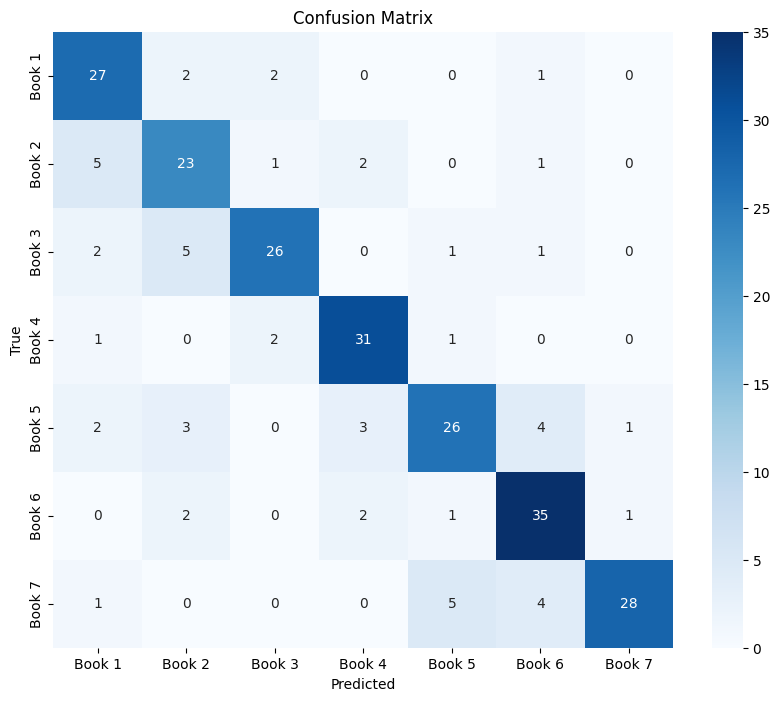

In [720]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_true = test_labels
y_pred = [nb_classifier.predict(page) for page in test_pages]

cm = confusion_matrix(y_true, y_pred, labels=[f'Book_{i}' for i in range(1, 8)])

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Book {i}' for i in range(1, 8)],
            yticklabels=[f'Book {i}' for i in range(1, 8)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

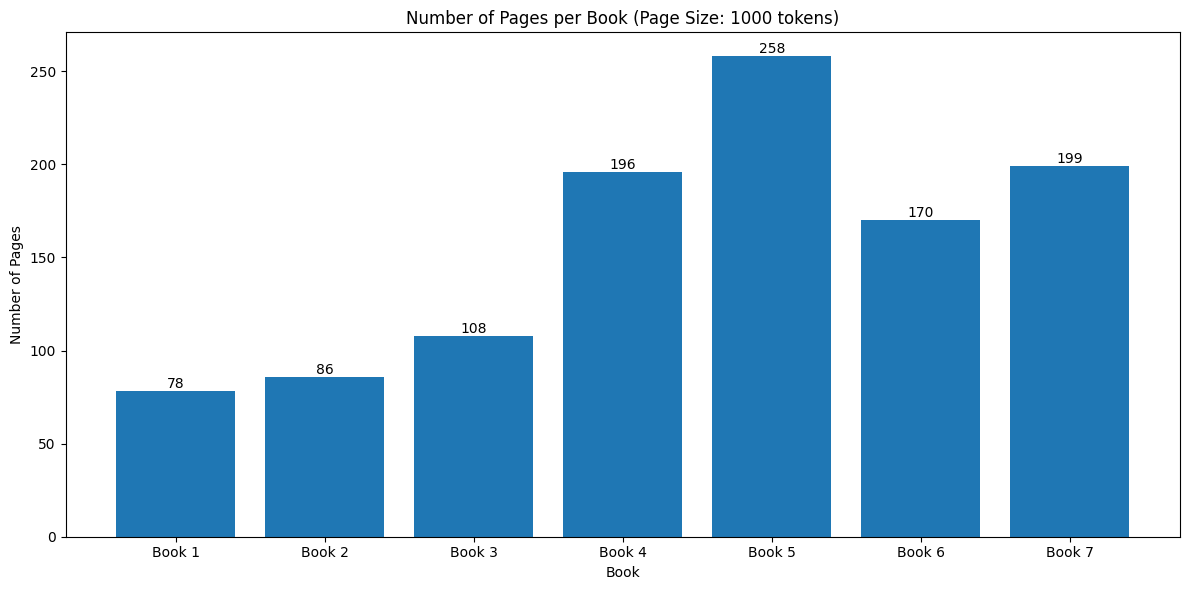

Book 1: 78 pages
Book 2: 86 pages
Book 3: 108 pages
Book 4: 196 pages
Book 5: 258 pages
Book 6: 170 pages
Book 7: 199 pages


In [721]:
import matplotlib.pyplot as plt

def count_pages_per_book(folder_path, page_size):
    book_page_counts = {}
    
    # Get all .txt files and sort them
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
    sorted_files = sorted(all_files)
    
    for book_num, filename in enumerate(sorted_files, 1):
        filepath = os.path.join(folder_path, filename)
        
        with open(filepath, 'r', encoding='utf-8') as f:
            text = f.read()
            tokens = clean_and_tokenize(text)
            # Count the number of pages
            num_pages = len([tokens[i:i+page_size] for i in range(0, len(tokens), page_size)])
            book_page_counts[f'Book {book_num}'] = num_pages
    
    return book_page_counts

# Count pages using a specific page size
page_size = 1000  # You can adjust this value
book_page_counts = count_pages_per_book(folder_path, page_size)

# Create a bar plot
plt.figure(figsize=(12, 6))
books = list(book_page_counts.keys())
pages = list(book_page_counts.values())

plt.bar(books, pages)
plt.title(f'Number of Pages per Book (Page Size: {page_size} tokens)')
plt.xlabel('Book')
plt.ylabel('Number of Pages')

# Add value labels on top of each bar
for i, v in enumerate(pages):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the exact numbers
for book, count in book_page_counts.items():
    print(f"{book}: {count} pages")

In [722]:
import itertools
from sklearn.model_selection import train_test_split

def find_best_params(folder_path, page_size_range, pages_per_book_range):
    best_accuracy = 0
    best_params = None
    
    for page_size in range(page_size_range[0], page_size_range[1] + 1, 10):
        for pages_per_book in range(pages_per_book_range[0], pages_per_book_range[1] + 1, 10):
            print(f"Trying page_size={page_size}, pages_per_book={pages_per_book}")
            
            # Load data
            data, labels, _ = load_data(folder_path, page_size=page_size, pages_per_book=pages_per_book)
            
            # Split data
            train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
            
            # Train classifier
            classifier = NaiveBayesClassifier()
            classifier.train(train_data, train_labels)
            
            # Test classifier
            correct = 0
            for page, true_label in zip(test_data, test_labels):
                if classifier.predict(page) == true_label:
                    correct += 1
            
            accuracy = correct / len(test_data)
            print(f"Accuracy: {accuracy:.4f}")
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = (page_size, pages_per_book)
            
            print()  # Empty line for readability
    
    return best_params, best_accuracy

# Define parameter ranges to try
page_size_range = (200, 260)  # Will try 800, 900, 1000, 1100, 1200, 1300, 1400
pages_per_book_range = (200, 260)  # Will try 40, 50, 60, 70

# Find best parameters
best_params, best_accuracy = find_best_params(folder_path, page_size_range, pages_per_book_range)

print(f"Best parameters: page_size={best_params[0]}, pages_per_book={best_params[1]}")
print(f"Best accuracy: {best_accuracy:.4f}")

Trying page_size=200, pages_per_book=200
Accuracy: 0.7464

Trying page_size=200, pages_per_book=210
Accuracy: 0.7347

Trying page_size=200, pages_per_book=220
Accuracy: 0.7143

Trying page_size=200, pages_per_book=230
Accuracy: 0.7453

Trying page_size=200, pages_per_book=240
Accuracy: 0.7173

Trying page_size=200, pages_per_book=250
Accuracy: 0.7029

Trying page_size=200, pages_per_book=260
Accuracy: 0.7390

Trying page_size=210, pages_per_book=200
Accuracy: 0.7821

Trying page_size=210, pages_per_book=210
Accuracy: 0.7483

Trying page_size=210, pages_per_book=220
Accuracy: 0.7532

Trying page_size=210, pages_per_book=230
Accuracy: 0.7298

Trying page_size=210, pages_per_book=240
Accuracy: 0.7321

Trying page_size=210, pages_per_book=250
Accuracy: 0.7286

Trying page_size=210, pages_per_book=260
Accuracy: 0.7308

Trying page_size=220, pages_per_book=200
Accuracy: 0.7214

Trying page_size=220, pages_per_book=210
Accuracy: 0.7041

Trying page_size=220, pages_per_book=220
Accuracy: 0.727